In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/datasets/cachorros/"

In [ ]:
base_dir = '/content/drive/My Drive/datasets/cachorros/'  # Caminho no seu Google Drive

# Configuração dos geradores de dados
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Separar 20% para validação
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Dados de treinamento
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Dados de validação
)

Found 256 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [ ]:
# Carregar o modelo VGG16 pré-treinado, excluindo as camadas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar os pesos do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Construir o modelo
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Saída binária (gatos/cachorros)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6012 - loss: 1.0515 - val_accuracy: 0.5484 - val_loss: 1.1802
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 846ms/step - accuracy: 0.8500 - loss: 0.3419 - val_accuracy: 0.5323 - val_loss: 1.3759
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 850ms/step - accuracy: 0.8885 - loss: 0.2779 - val_accuracy: 0.6613 - val_loss: 1.0860
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 803ms/step - accuracy: 0.8901 - loss: 0.2363 - val_accuracy: 0.7581 - val_loss: 0.7901
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 951ms/step - accuracy: 0.9165 - loss: 0.2396 - val_accuracy: 0.6129 - val_loss: 1.2628
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 841ms/step - accuracy: 0.9640 - loss: 0.1483 - val_accuracy: 0.7258 - val_loss: 1.0993
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 822ms/step - accuracy: 0.9546 - loss: 0.1430 - val_accuracy: 0.6935 - val_loss: 1.1656
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9565 - loss: 0.1230 - val_accuracy: 0.7097 - val_los

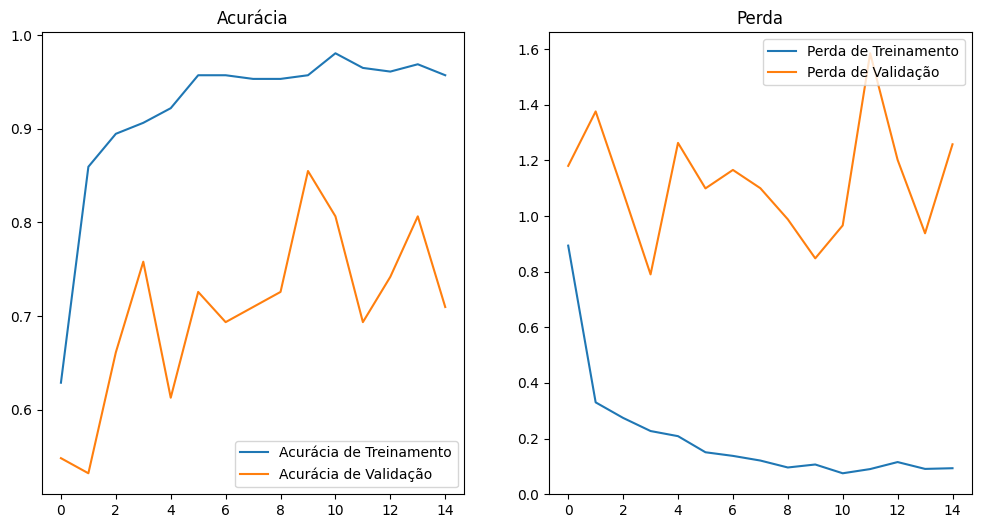

In [ ]:
# Gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treinamento')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda')
plt.show()

In [ ]:
model.save('capitu_vs_weiss_transfer_learning.keras')

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verificar o diretório atual e criar um novo diretório de trabalho
!mkdir -p /content/working_dir
import os
os.chdir("/content/working_dir")

# Clonar o repositório
!git clone https://github.com/Gilnanderson/transfer-learning-capitu-weiss.git

# Verificar o caminho do arquivo no Google Drive
!ls /content/drive/MyDrive/

# Copiar o arquivo .ipynb para o repositório clonado
!cp /content/drive/MyDrive/transfer_learning_2.ipynb /content/working_dir/transfer-learning-capitu-weiss/

# Navegar até o diretório do repositório
os.chdir("/content/working_dir/transfer-learning-capitu-weiss")

# Configurar o nome de usuário e o e-mail do Git
!git config --global user.email "gilnanderson@gmail.com"
!git config --global user.name "Gilnanderson"

# Remover o segredo do arquivo transfer_learning_2.ipynb
# Abra o arquivo e edite-o para remover qualquer informação sensível
# Em seguida, salve o arquivo
with open("transfer_learning_2.ipynb", "r") as file:
    content = file.read()
content = content.replace("", "")
with open("transfer_learning_2.ipynb", "w") as file:
    file.write(content)

# Instalar git-filter-repo se ainda não estiver instalado
!pip install git-filter-repo

# Usar git filter-repo para remover o segredo dos commits anteriores
!git filter-repo --force --path transfer_learning_2.ipynb --replace-text <(echo 's///g')

# Adicionar o remote origin novamente
token = ""
!git remote add origin https://{token}@github.com/Gilnanderson/transfer-learning-capitu-weiss.git

# Fazer o pull para integrar as mudanças remotas e resolver conflitos
!git config pull.rebase false  # ou true para rebase, ou ff only para fast-forward only
!git pull origin main --allow-unrelated-histories

# Completar a mensagem de merge automaticamente
!git commit -m "Merge branch 'main' of https://github.com/Gilnanderson/transfer-learning-capitu-weiss"

# Adicionar, commitar e enviar o arquivo para o repositório
!git add transfer_learning_2.ipynb
!git commit -m "Remove sensitive information from transfer_learning_2.ipynb"

# Autenticar e fazer o push
!git push origin main --force  # Use 'main' ou 'master' conforme a branch padrão do seu repositório

Mounted at /content/drive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Cloning into '/content/transfer-learning-capitu-weiss'...
fatal: Unable to read current working directory: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
'2º. capítulo.gdoc'		     M5_formato+trabalho.docx
'3º. capítulo recuperado.gdoc'	    'M5 | Tarefa - Praticando gestão de serviços.gdoc'
'Agents without phone 2.gsheet'     'M7_formato trabalho excel.xlsx'
'Agents without phone.gsheet'	    'M8_formato trabalho.docx'
 AI_Metodos_Ageis_Gilnanderson.pdf   mailing.gsheet
'Apresentação sem título.gslides'    matriz_ai_metodos_ageis.docx
'bacharel de direito.gsheet'	     matriz_ai_pgo_ger_aquisicoes_proj.docx
 Backup				    'New Energy Car.pptx'
'Colab Notebooks'		     ODEMIR.docx
'Cultura, Ética e Diferença'	    'OD OI En contexto.doc.gdoc'
 Curric